In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import math

In [17]:
def read_txt(file, cache):
    with open(file, "r") as f:
        for line in f:
            dom, prob, plan_ind, time = line.split("\t")
            time = float(time.split(" ")[-1].strip())
            if dom not in cache:
                cache[dom] = {}
            cache[dom][(prob, plan_ind)] = time

In [18]:
cyk_file = os.path.join("finished-log", "time-log-cyk.txt")
pl_file = os.path.join("finished-log", "time-log-pl.txt")
cache_cyk = {}
cache_pl = {}
read_txt(cyk_file, cache_cyk)
read_txt(pl_file, cache_pl)

In [19]:
def get_total_instance():
    domain_count = {}
    solved_file = os.path.join("finished-log", "time-log-cyk.txt")
    unsolved_file = os.path.join("finished-log", "err-log-cyk.txt")
    with open(solved_file, "r") as f:
        for line in f:
            dom, prob, plan_ind, time = line.split("\t")
            if dom in domain_count:
                domain_count[dom] += 1
            else:
                domain_count[dom] = 1
    with open(unsolved_file, "r") as f:
        for line in f:
            dom, prob, plan_ind, time = line.split("\t")
            if dom in domain_count:
                domain_count[dom] += 1
            else:
                domain_count[dom] = 1
    return domain_count

In [20]:
def fetch_domain(dom, cache_cyk, cache_pl):
    data_cyk = []
    data_pl = []
    for key, val in cache_cyk[dom].items():
        if key in cache_pl[dom]:
            data_cyk.append(val)
            data_pl.append(cache_pl[dom][key])
    return data_cyk, data_pl

def fetch_domain_all(dom, cache_cyk, cache_pl):
    data_cyk = []
    data_pl = []
    for key, val in cache_cyk[dom].items():
        data_cyk.append(val)
    for key, val in cache_pl[dom].items():
        data_pl.append(val)
    return data_cyk, data_pl

In [ ]:
for dom in cache_cyk.keys():
    data_cyk, data_pl = fetch_domain(dom, cache_cyk, cache_pl)
    figure(figsize = (15, 6))
    bar_width = 0.35
    #     data_cyk = data_cyk[:31]
    #     data_pl = data_pl[:31]
    # fig, ax = plt.subplots()
    x = np.arange(len(data_cyk))
    plt.bar(x - bar_width/2, data_cyk, bar_width, label="CYK-based")
    plt.bar(x + bar_width/2, data_pl, bar_width, label="Planning-based")
    plt.legend()
    plt.xticks([], [])
    plt.ylabel("Run times in seconds")
    plt.yscale=("log")
    plt.title(dom, fontsize=20)
    plt.show()

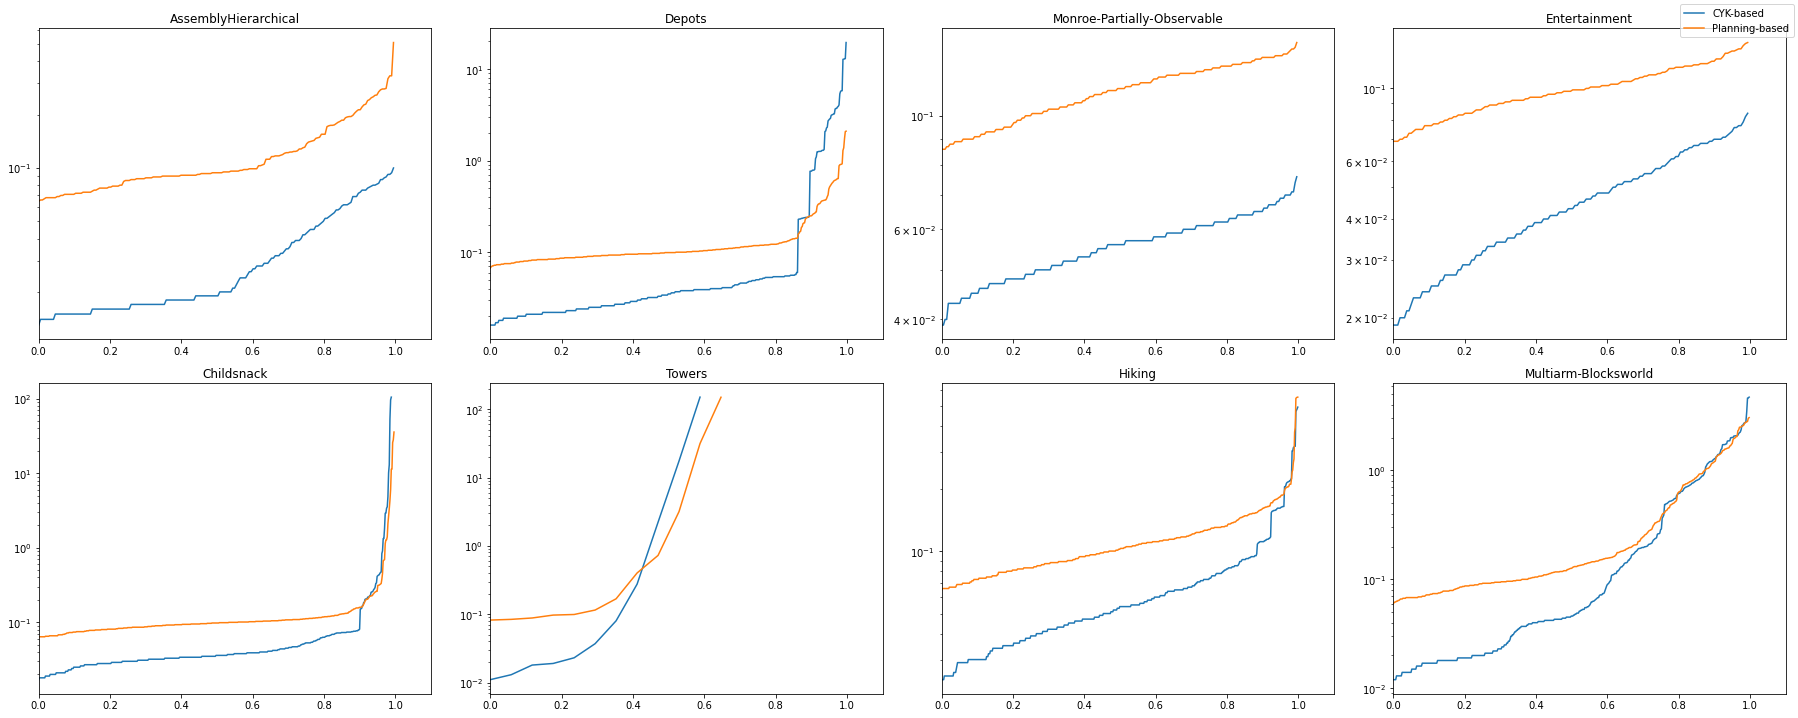

In [37]:
domain_count = get_total_instance()
total_domains = len(domain_count.keys())
cols = 4
rows = math.ceil(total_domains / cols)
rows = int(rows / 2) - 1
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))
keys = list(cache_cyk.keys())
for idx, dom in enumerate(keys[8:16]):
    r = int(idx / cols)
    c = idx % cols
    
    data_cyk, data_pl = fetch_domain_all(dom, cache_cyk, cache_pl)
    total_len = domain_count[dom]
    data_cyk.sort()
    data_pl.sort()
    perc_cyk = [x / total_len for x in range(len(data_cyk))]
    perc_pl = [x / total_len for x in range(len(data_pl))]
    
    ax = axs[r, c]
    ax.plot(perc_cyk, data_cyk, label="CYK-based")
    ax.plot(perc_pl, data_pl, label="Planning-based")
#     ax.set_xlabel("Percentage of solved instances")
#     ax.set_ylabel("Runtime in seconds")
    ax.set_xlim(0, 1.1)
    ax.set_title(dom.split(" ")[-1])
    ax.set_yscale("log")
    # ax.legend()
# axs[-1, -1].axis("off")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels)
plt.tight_layout()
plt.savefig("runtime-comparison.png", dpi=800)
    